# 1- import packages and load data 📚

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df= pd.read_csv('italy-covid-daywise.csv')

In [39]:
# retrieve the number of rows and columns in the data frame
df.shape

(248, 4)

In [40]:
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [41]:
# view statistical information for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,248.0,1094.818548,1554.508002,-148.0,123.0,342.0,1371.75,6557.0
new_deaths,248.0,143.133065,227.105538,-31.0,3.0,17.0,175.25,971.0
new_tests,135.0,31699.674074,11622.209757,7841.0,25259.0,29545.0,37711.00,95273.0


In [42]:
# view some basic information about the data frame like data types, and number of non-nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


### From above we need to change type for date to datetime , also we have a nan nalues for last column(new_tests)

In [43]:
# create a list of columns within the data frame
df_col=df.columns
df_col

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [44]:
# return only the days which had more than 1000 reported cases
df[df['new_cases']>1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [45]:
# create positive_rate column that is equal to new_cases / new_tests
df['positive_rate']= df['new_cases']/ df['new_tests']
df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [46]:
# let's remove the positive_rate column
df.drop('positive_rate',axis=1,inplace=True)
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [47]:
# sort to identify the days with the highest number of cases
df.sort_values(by='new_cases',ascending=False)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


In [48]:
# check the data type of date column,then convert it into a datetime
df['date']=pd.to_datetime(df['date'])
# Print info to Make sure the date is converted to datetime 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        248 non-null    datetime64[ns]
 1   new_cases   248 non-null    float64       
 2   new_deaths  248 non-null    float64       
 3   new_tests   135 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB


In [49]:
# extract different parts (day, month, weekday, and year) of the date column into separate columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.strftime('%A')
df['year'] = df['date'].dt.year

df

,date,new_cases,new_deaths,new_tests,day,month,weekday,year
0,2019-12-31,0.0,0.0,NaN,31,12,Tuesday,2019
1,2020-01-01,0.0,0.0,NaN,1,1,Wednesday,2020
2,2020-01-02,0.0,0.0,NaN,2,1,Thursday,2020
3,2020-01-03,0.0,0.0,NaN,3,1,Friday,2020
4,2020-01-04,0.0,0.0,NaN,4,1,Saturday,2020
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,8,Sunday,2020
244,2020-08-31,1365.0,4.0,42583.0,31,8,Monday,2020
245,2020-09-01,996.0,6.0,54395.0,1,9,Tuesday,2020
246,2020-09-02,975.0,8.0,NaN,2,9,Wednesday,2020


In [50]:
# check the overall metrics for May (i.e, the total numbers of 'new_cases', 'new_deaths', 'new_tests')

may_data = df[df['date'].dt.month == 5]

# Calculate the total numbers for 'new_cases', 'new_deaths', 'new_tests' in May

total_newcases = may_data['new_cases'].sum()
total_newdeaths = may_data['new_deaths'].sum()
total_newtests = may_data['new_tests'].sum()

# now we can print ...

print(f"Total New_Cases in May: {total_newcases}")
print(f"Total New_Deaths in May: {total_newdeaths}")
print(f"Total New_Tests in May: {total_newtests}")

Total New_Cases in May: 29073.0
Total New_Deaths in May: 5658.0
Total New_Tests in May: 1078720.0


In [51]:
#which day seems like have more cases?

days_grouped = df.groupby('day')['new_cases'].sum()

# Sorting the grouped in descending order
sorted_days = days_grouped.sort_values(ascending=False)

print(sorted_days)

day
22    11241.0
23    11216.0
27    10827.0
29    10732.0
25    10680.0
28    10284.0
21    10201.0
20     9894.0
24     9785.0
30     9677.0
17     9578.0
26     9406.0
19     9130.0
13     9018.0
3      8998.0
2      8938.0
12     8730.0
18     8573.0
15     8487.0
10     8044.0
1      8037.0
14     7625.0
9      7475.0
16     7371.0
6      7254.0
5      7215.0
4      7143.0
7      6700.0
8      6573.0
11     6467.0
31     6216.0
Name: new_cases, dtype: float64


### So day 22 have more cases ..

In [52]:
# create a new dataframe with month-wise data

monthlyy_data = df.groupby('month').agg({
    'new_cases': 'sum',  
    'new_deaths': 'sum',  
    'new_tests': 'sum'      
}).reset_index()

monthlyy_data

,month,new_cases,new_deaths,new_tests
0,1,3.0,0.0,0.0
1,2,885.0,21.0,0.0
2,3,100851.0,11570.0,0.0
3,4,101852.0,16091.0,419591.0
4,5,29073.0,5658.0,1078720.0
5,6,7772.0,1404.0,830354.0
6,7,6722.0,388.0,797692.0
7,8,21060.0,345.0,1098704.0
8,9,3297.0,20.0,54395.0
9,12,0.0,0.0,0.0


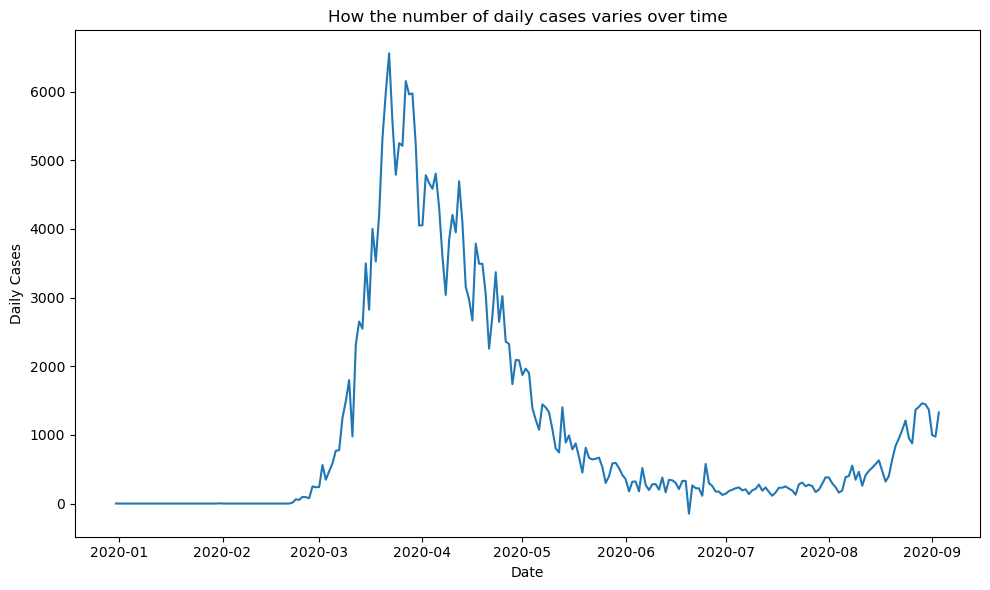

In [53]:
# plot a line graph showing how the number of daily cases varies over time.

plt.figure(figsize=(10, 6))

sns.lineplot(x='date', y='new_cases', data=df)

# Rotate x-axis labels
# plt.xticks(rotation=45)

plt.title('How the number of daily cases varies over time')
plt.xlabel('Date')
plt.ylabel('Daily Cases')

plt.tight_layout()
plt.show()